Размер изображения:
PNG (440, 440) RGB


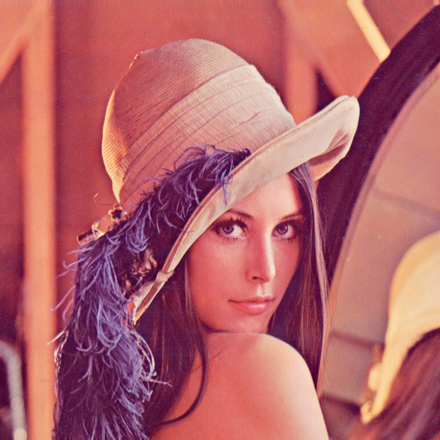

In [134]:
from IPython.display import display
from PIL import Image,ImageColor
import colorsys

im_init = Image.open('./test_r1.jpg')
im_init = Image.open('./test.png')

print("Размер изображения:")  
print(im_init.format, im_init.size, im_init.mode)
pixelMap = im_init.load()

im_resultRGB = Image.new( im_init.mode, im_init.size)
im_resultHSV = Image.new( im_init.mode, im_init.size)

pixelMapRGB = im_resultRGB.load()
pixelMapHSV = im_resultHSV.load()

display(im_init)

Новый размер 44
Свертываются пиксели (10, 10)


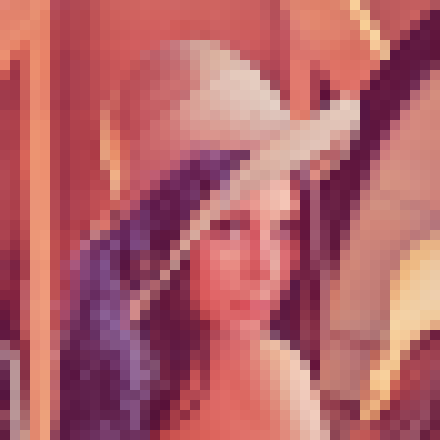

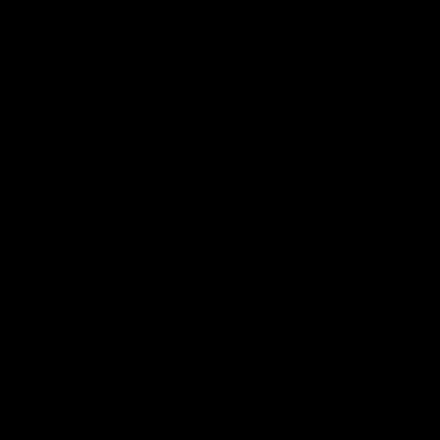

In [135]:
newSize = 44
print("Новый размер",newSize)

pixelNumMapped = (round(im_init.size[0]/newSize),round(im_init.size[1]/newSize))
print("Свертываются пиксели",pixelNumMapped)

pixelAvg = (0,0,0)
n=0

img_smallRGB = Image.new( im_init.mode, (newSize,newSize))
img_smallHSV = Image.new( im_init.mode, (newSize,newSize))
newSize = newSize - 1

pixelsNewRGB = img_smallRGB.load()
pixelsNewHSV = img_smallHSV.load()

for i in range(img.size[0]):
    for j in range(img.size[1]):
        pixelAvgRGB=(0,0,0)
        pixelAvgHSV=(0,0,0)
        n=0
        for ii in range(0,round(pixelNumMapped[0])):
         for jj in range(0,round(pixelNumMapped[1])):
            n=n+1
            
            pixelCur = pixelMap[i*pixelNumMapped[0] + ii,j*pixelNumMapped[1] + jj]
            pixelHsv = colorsys.rgb_to_hsv(pixelCur[0]/ float(255),pixelCur[1]/ float(255),pixelCur[2]/ float(255))
            
#             print("pixelCur",pixelCur)
#             print("pixelHsv",pixelHsv)
            
            pixelAvgRGB = (pixelAvgRGB[0]+pixelCur[0],
                        pixelAvgRGB[1]+pixelCur[1],
                        pixelAvgRGB[2]+pixelCur[2])  
            
            pixelAvgHSV = (pixelAvg[0]+pixelHsv[0],
                        pixelAvg[1]+pixelHsv[1],
                        pixelAvg[2]+pixelHsv[2]) 
            
            shakalPixelRGB = (round(pixelAvgRGB[0]/n),round(pixelAvgRGB[1]/n),round(pixelAvgRGB[2]/n))
            shakalPixelHSV = (round(pixelAvgHSV[0]/n),round(pixelAvgHSV[1]/n),round(pixelAvgHSV[2]/n))
            pixelsNewRGB[i,j] = shakalPixelRGB
            pixelsNewHSV[i,j] = shakalPixelHSV
            
for i in range(im_init.size[0]):
    for j in range(im_init.size[1]):
        ii=i/pixelNumMapped[0]
        jj=j/pixelNumMapped[1]
#         print(i,j,ii,jj)
        pixelMapRGB[i,j] = pixelsNewRGB[ii,jj]
        floatHSV = colorsys.hsv_to_rgb(pixelsNewHSV[ii,jj][0],pixelsNewHSV[ii,jj][1],pixelsNewHSV[ii,jj][2])
        pixelMapHSV[i,j] = (round(floatHSV[0]*float(255)),
                            round(floatHSV[1]*float(255)),
                            round(floatHSV[2]*float(255)))
        
display(im_resultRGB)
display(im_resultHSV)

(240, 140, 105)
(240, 140, 105)
(0.0432098765432099, 0.5625, 0.9411764705882353)
(0.9411764705882353, 0.5490196078431374, 0.4117647058823529)
(240, 140, 105)


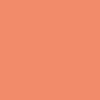

In [133]:
color_rgb = (240, 140, 105)
#color = (255, 0, 0)
print(color)
color_hsv = colorsys.rgb_to_hsv(color_rgb[0]/ float(255),color_rgb[1]/ float(255),color_rgb[2]/ float(255))
print(color_rgb)
print(color_hsv)

color_hsv_restore = colorsys.hsv_to_rgb(color_hsv[0],color_hsv[1],color_hsv[2])
print(color_hsv_restore)
color_hsv_restore = (round(color_hsv_restore[0]*float(255)),
                            round(color_hsv_restore[1]*float(255)),
                            round(color_hsv_restore[2]*float(255)))
print(color_hsv_restore)

display(Image.new(mode="RGB", size=(100, 100), color=color_rgb))
# display(Image.new(mode="HSV", size=(100, 100), color=color_hsv))

(1, 2, 3, 1, 2, 3)